In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This dataset contains 5110 rows with 12 different characteristics:

- **id**: unique identifier;
- **gender**: the patient's gender ("Male", "Female" or "Other");
- **age**: patient's age;
- **hypertension**: the presence of hypertension (0 - no, 1 - yes);
- **heart_disease**: presence of heart disease (0 - no, 1 - yes);
- **ever_married**: marriage status ("No" or "Yes");
- **work_type**: type of work ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed");
- **Residence_type**: type of residence ("Rural" or "Urban");
- **avg_glucose_level**: average blood glucose level;
- **bmi**: body mass index;
- **smoking_status**: smoking status ("formerly smoked", "never smoked", "smokes" or "Unknown");
- **stroke**: whether a stroke has occurred (0 - no, 1 - yes).



In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Stroke/strokeDataSet.csv'
df = pd.read_csv(file_path)

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df_col = df.columns

df_col

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
 df.duplicated().sum()

0

***categorical***

In [9]:
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables are:', len(categorical))

df[categorical].head()

Number of categorical variables are: 5


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [10]:
df[categorical].isnull().sum()

,0
gender,0
ever_married,0
work_type,0
Residence_type,0
smoking_status,0


In [11]:
for var in categorical:
    print("+" * 40)
    print(df[var].value_counts())

++++++++++++++++++++++++++++++++++++++++
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [12]:
for feature in categorical:
    print('Feature', feature, 'has', df[feature].nunique(), 'labels')

Feature gender has 3 labels
Feature ever_married has 2 labels
Feature work_type has 5 labels
Feature Residence_type has 2 labels
Feature smoking_status has 4 labels


# ***numerical***


In [13]:
numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables are:', len(numerical))

df[numerical].head()

Number of numerical variables are: 7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [14]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,201
stroke,0


In [15]:
# Заповнення пропущених значень медіанним
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [16]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
stroke,0


***Викиди у числових змінних***



In [17]:
print(round(df[numerical].describe()),2)

            id     age  hypertension  heart_disease  avg_glucose_level  \
count   5110.0  5110.0        5110.0         5110.0             5110.0   
mean   36518.0    43.0           0.0            0.0              106.0   
std    21162.0    23.0           0.0            0.0               45.0   
min       67.0     0.0           0.0            0.0               55.0   
25%    17741.0    25.0           0.0            0.0               77.0   
50%    36932.0    45.0           0.0            0.0               92.0   
75%    54682.0    61.0           0.0            0.0              114.0   
max    72940.0    82.0           1.0            1.0              272.0   

          bmi  stroke  
count  5110.0  5110.0  
mean     29.0     0.0  
std       8.0     0.0  
min      10.0     0.0  
25%      24.0     0.0  
50%      28.0     0.0  
75%      33.0     0.0  
max      98.0     1.0   2



Я намалюю блок-діаграми, щоб візуалізувати викиди у вищезгаданих змінних.

Text(0, 0.5, 'bmi')

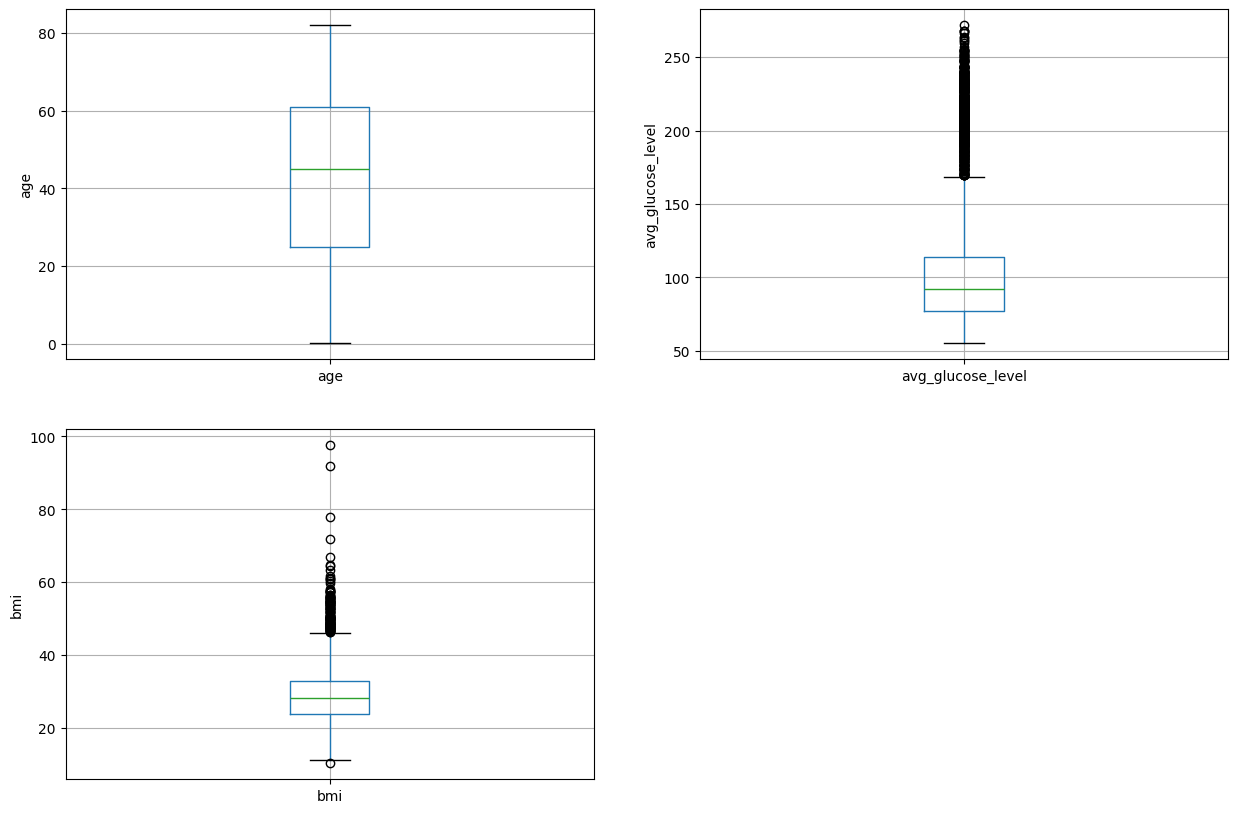

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='avg_glucose_level')
fig.set_title('')
fig.set_ylabel('avg_glucose_level')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='bmi')
fig.set_title('')
fig.set_ylabel('bmi')

Тепер я побудую гістограми, щоб перевірити розподіл і з'ясувати, чи є він нормальним або асиметричним. Якщо змінна має нормальний розподіл, то я проведу «Аналіз екстремальних значень», якщо ж розподіл асиметричний, то знайду IQR (міжквартильний розмах).

Text(0, 0.5, 'stroke')

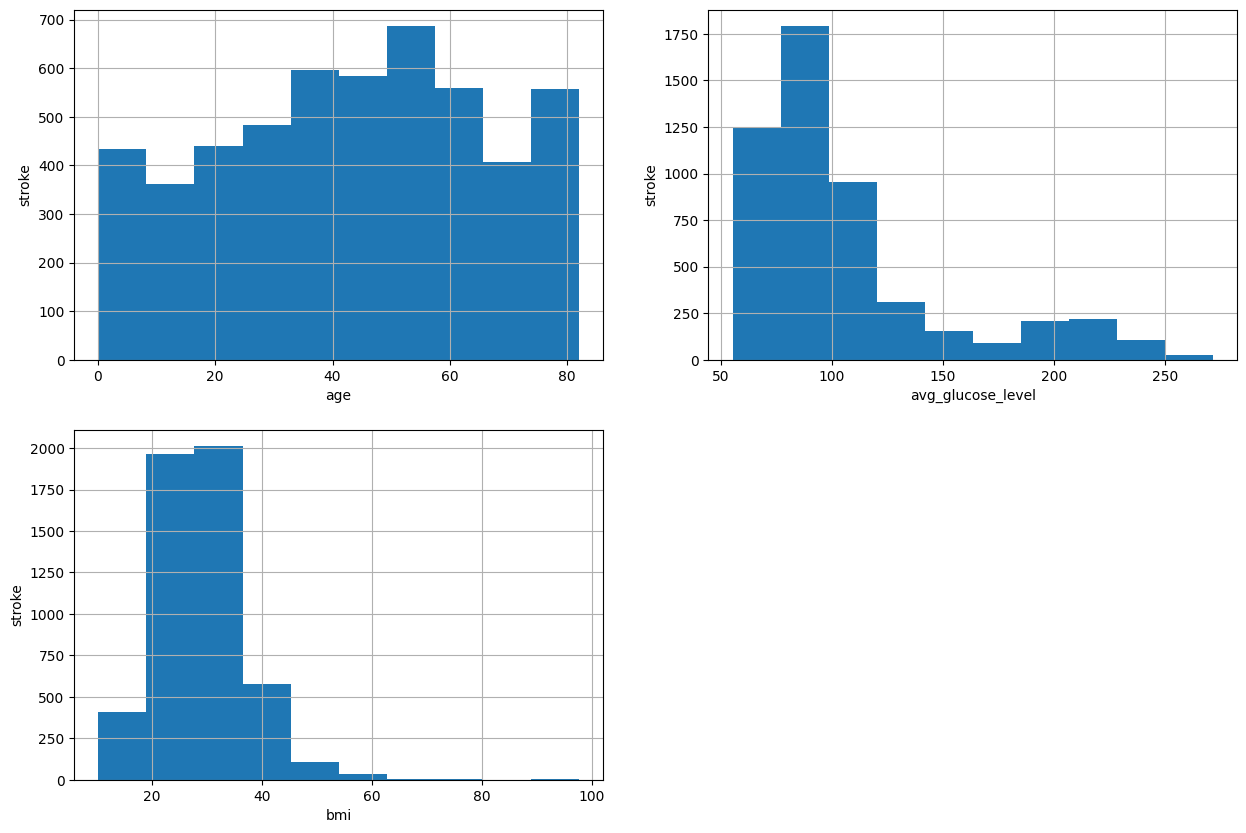

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.age.hist(bins=10)
fig.set_xlabel('age')
fig.set_ylabel('stroke')

plt.subplot(2, 2, 2)
fig = df.avg_glucose_level.hist(bins=10)
fig.set_xlabel('avg_glucose_level')
fig.set_ylabel('stroke')


plt.subplot(2, 2, 3)
fig = df.bmi.hist(bins=10)
fig.set_xlabel('bmi')
fig.set_ylabel('stroke')

Ми бачимо, що дві змінні є асиметричними. Тому я використаю інтерквартильний розмах, щоб знайти викиди.

In [20]:
age_IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
age_lower_fence = df.age.quantile(0.25) - (age_IQR * 1.5)
age_upper_fence = df.age.quantile(0.75) + (age_IQR * 1.5)
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=age_lower_fence, upperboundary=age_upper_fence))

glucose_IQR = df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25)
glucose_lower_fence = df.avg_glucose_level.quantile(0.25) - (glucose_IQR * 1.5)
glucose_upper_fence = df.avg_glucose_level.quantile(0.75) + (glucose_IQR * 1.5)

print('avg_glucose_level outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=glucose_lower_fence, upperboundary=glucose_upper_fence))

bmi_IQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
bmi_lower_fence = df.bmi.quantile(0.25) - (bmi_IQR * 1.5)
bmi_upper_fence = df.bmi.quantile(0.75) + (bmi_IQR * 1.5)
print('bmi outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=bmi_lower_fence, upperboundary=bmi_upper_fence))

age outliers are values < -29.0 or > 115.0
avg_glucose_level outliers are values < 21.977500000000006 or > 169.35750000000002
bmi outliers are values < 10.300000000000006 or > 46.29999999999999


Обрізаємо викиди

In [21]:
df['age'] = np.where(df['age'] > age_upper_fence, age_upper_fence, df['age'])
df['age'] = np.where(df['age'] < age_lower_fence, age_lower_fence, df['age'])

df['avg_glucose_level'] = np.where(df['avg_glucose_level'] > glucose_upper_fence, glucose_upper_fence, df['avg_glucose_level'])
df['avg_glucose_level'] = np.where(df['avg_glucose_level'] < glucose_lower_fence, glucose_lower_fence, df['avg_glucose_level'])

df['bmi'] = np.where(df['bmi'] > bmi_upper_fence, bmi_upper_fence, df['bmi'])
df['bmi'] = np.where(df['bmi'] < bmi_lower_fence, bmi_lower_fence, df['bmi'])

In [22]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,100.996204,28.690411,0.048728
std,21161.721625,22.612647,0.296607,0.226063,33.214738,7.120858,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,169.357500,46.300000,1.000000


In [23]:
df[categorical].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [24]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

print(df)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046    Male  67.0             0              1             1   
1     51676  Female  61.0             0              0             1   
2     31112    Male  80.0             0              1             1   
3     60182  Female  49.0             0              0             1   
4      1665  Female  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234  Female  80.0             1              0             1   
5106  44873  Female  81.0             0              0             1   
5107  19723  Female  35.0             0              0             1   
5108  37544    Male  51.0             0              0             1   
5109  44679  Female  44.0             0              0             1   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban           169.3575  

In [25]:
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'])

df

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,169.3575,36.6,1,False,True,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,1,169.3575,28.1,1,True,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,1,105.9200,32.5,1,False,True,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,1,169.3575,34.4,1,True,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,1,169.3575,24.0,1,True,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,83.7500,28.1,0,True,False,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,1,125.2000,40.0,0,True,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,1,82.9900,30.6,0,True,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,1,166.2900,25.6,0,False,True,...,False,True,False,False,True,False,False,True,False,False


In [26]:
 df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   gender_Female                   5110 non-null   bool   
 9   gender_Male                     5110 non-null   bool   
 10  gender_Other                    5110 non-null   bool   
 11  work_type_Govt_job              5110 non-null   bool   
 12  work_type_Never_worked          51